# Deterministic Modelling for T7 with IPTG

In [158]:
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline
from scipy.integrate import odeint

In [159]:
k_smr = 0.23
lambda_mr = 0.462
k_sr = 15
lambda_r = 0.2
k_2r = 50
k_Neg_2r = 1e-3
k_rt7 = 960
k_Neg_rt7 = 2.4
lambda_r2 = 0.2
k_dr1 = 3e-7
k_Neg_dr1 = 12
k_dr2 = 3e-7
k_Neg_dr2 = 4.8e3
k_rcre = 960
k_Neg_rcre = 2.4
k_dr3 = 3e-7
k_Neg_dr3 = 4.8e3
lambda_i2r2 = 0.2
k_s0mt7 = 0.01
k_s1mt7 = 0.5
lambda_mt = 0.462
k_st7 = 30
lambda_t7 = 0.2

In [160]:
def f(y, t):
     mr = y[0]
     r = y[1]
     r2 = y[2]
     ot7 = y[3]
     i2r2 = y[4]
     mt7 = y[5]
     t7 = y[6]
     i = y[7]
    
     f0 = k_smr - lambda_mr*mr
     f1 = k_sr*mr - 2*k_2r*r*r + 2*k_Neg_2r*r2 - lambda_r*r
     f2 = k_2r*r*r - k_Neg_2r*r2 - k_rt7*r2*ot7 + k_Neg_rt7*(2.08-ot7) - k_dr1*i*i*r2 + k_Neg_dr1*i2r2 - lambda_r2*r2
     f3 = -k_rt7*r2*ot7 + k_Neg_rt7*(2.08-ot7) + k_dr2*i*i*(2.08-ot7) - k_Neg_dr2*i2r2*ot7 
     f4 = k_dr1*i*i*r2 - k_Neg_dr1*i2r2 + k_dr2*i*i*(2.08-ot7) - k_Neg_dr2*i2r2*ot7 - lambda_i2r2*i2r2
     f5 = k_s0mt7*(2.08-ot7) + k_s1mt7*ot7 - lambda_mt*mt7
     f6 = k_st7*mt7 - lambda_t7*t7
     f7 = 0 
     return [f0, f1, f2, f3, f4, f5, f6, f7]


In [161]:
mr_0 = 0
r_0 = 0
r2_0 = 0
ot7_0 = 2.08
i2r2_0 = 0
mt7_0 = 0
t7_0 = 0
i_0 = 0 
                
y0 = [mr_0, r_0, r2_0, ot7_0, i2r2_0, mt7_0, t7_0, i_0]     # initial condition vector
t  = np.linspace(0, 400, 2000)         # time grid


In [162]:
soln = odeint(f, y0, t)

mr = soln[:, 0]
r = soln[:, 1]
r2 = soln[:, 2]
ot7 = soln[:, 3]
i2r2 = soln[:, 4]
mt7 = soln[:, 5]
t7 = soln[:, 6]
i = soln[:, 7]

In [163]:
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

T7:  6.79788009756
R2:  18.5323576575


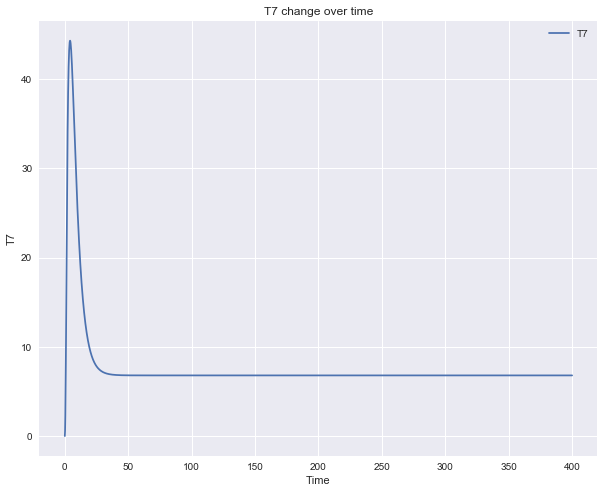

In [164]:
plt.figure()
plt.plot(t, t7, label='T7')
plt.xlabel('Time')
plt.ylabel('T7')
plt.title('T7 change over time')
plt.legend(loc=0)

#axes = plt.gca()
#axes.set_ylim([0,6000])
#axes.set_xlim([0,120])
print("T7: ", t7[1999])
print("R2: ", r2[1999])

In [165]:
y_e = []
for i in range(7):
    sol = soln[:, i]
    y_e.append(sol[1999])

y_e.append(100000)   

In [166]:
t  = np.linspace(0, 400, 2000)         # time grid
soln = odeint(f, y_e, t)

mr = soln[:, 0]
r = soln[:, 1]
r2 = soln[:, 2]
ot7 = soln[:, 3]
i2r2 = soln[:, 4]
mt7 = soln[:, 5]
t7 = soln[:, 6]
i = soln[:, 7]

In [167]:
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

17.5911264411


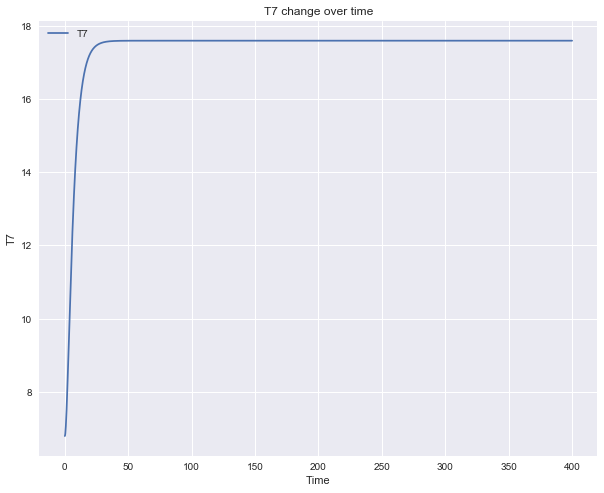

In [168]:
plt.figure()
plt.plot(t, t7, label='T7')
plt.xlabel('Time')
plt.ylabel('T7')
plt.title('T7 change over time')
plt.legend(loc=0)

#axes = plt.gca()
#axes.set_ylim([4400,4800])
#axes.set_xlim([0,500])
print(t7[1999])